### Like 06_experimental_classifier . . . 

 . . . except that I'm removing four more stopwords, and using tf-idf.  Also added normalization, and I'm using a linear kernel for SVC.

In [1]:
import glob

clean_files = sorted(glob.glob('/home/spenteco/Downloads/test_xml/*.xml'))

print(len(clean_files))

37


In [2]:
import re
from lxml import etree
from nltk.corpus import stopwords

sw = set(stopwords.words('french') + ['ici', 'là', 'elles', 'trop', 'tous', 'selon', 'presque', 'tant', 
                                      'fois', 'quant', 'ainsi', 'cette', 'doit', 'tout', 'bien', 'toute', 
                                      'si', 'autre', 'sans', 'comment', 'rien', 'là', 'peu', 'mêmes', 'si', 
                                      'plutôt', 'ceux', 'faire', 'moins', 'être', 'faudra', 
                                      'deux', 'a', 'paris', 'plus', 'où', 'saint', 'cette'])

def is_number(w):

    result = False
    
    try:
        n = int(w)
        result = True
    except ValueError:
        pass
    
    return result

def is_t_valid(t):
    
    terms_to_find= [r'Notre-\s*Dame', 'Cité', 'Saint-\s*Louis', 'Arènes', 
        r'Palais\s*de\s*Justice|Palais-\s*de-\s*Justice',
        'Morgue', r'Sainte-\s*Chapelle', 'Conciergerie', r'[Qq]uai\s*de\s*l\'Horloge', r'Pont-\s*Neuf', r'Cluny|Thermes',
        r'Saint-\s*Germain-\s*des-\s*Prés', 'Nesle', r'[Ss]aint-\s*Sulpice', r'[Pp]alais\s*du\s* Luxembourg', 
        r'[Jj]ardin\s*du\s*Luxembourg', 'Observatoire', r'Panthéon|Sainte-\s*Geneviève', r'[Eéeé]glise\s*Saint-\s*Étienne',
        'Odéon', r'[Jj]ardin\s*des\s*Plantes', 'Gobelins', 'Auxerrois', 'Louvre', r'Carrousel|Doyenné', 'Tuileries', 
        r'Palais-\s*Royal', r'Comédie-\s*Française', 'Bourse', 'Innocents', 'Halles', r'Saint-\s*Eustache', 'Temple',
        r'[Tt]our\s*Saint-\s*Jacques', r'H[oôóòö]tel\s*de\s*Ville|Gr[eêéèë]ve', 'Rivoli', 
        r'Bastille|[Cc]olonne\s*de\s*Juillet', 'Tournelles', r'[Bb]oulevar[dt]\s*de\s*la\s*Madeleine', 'Capucines',
        r'[Bb]oulevard\s*des\s*Italiens', r'[Bb]oulevar[dt]\s*Montmartre', r'[Bb]oulevar[dt]\s*Poissonnière',
        r'[Bb]oulevar[dt]\s*Bonne-\s*Nouvelle', r'[Bb]oulevar[dt]\s*Saint-\s*Denis', r'[Bb]oulevar[dt]\s*Saint-\s*Martin',
        r'[Bb]oulevar[dt]\s*du\s*Temple|[Bb]oulevard\s*du\s*crime', r'[Bb]oulevar[dt]\s*des\s*Filles', 'Beaumarchais',
        r'[Pp]orte\s*Saint-Denis', r'[Cc]afé\s*Tortoni', r'[Cc]afé\s*Anglais', 'Maison-\s*Dorée', 
        r'Notre-\s*Dame-\s*de-\s*Lorette', 'Opéra-\s*[Cc]omique', 'Panorama', 'Opéra', r'[Aa]venue\s*\s*de\s*l’Op[eé]ra',
        r'[Rr]ue\s*de\s*la\s*Paix|[Rr]ue\s*\de\s* Napoléon', 'Vivienne', r'[Rr]ue\s*Saint-\s*Jacques', 
        r'[Rr]ue\s*Saint-\s*Denis', r'[Ff]aubourg\s*Saint-\s*Honoré', r'[Rr]ue\s*du\s*[Ff]aubourg\s*Saint-\s*Antoine',
        r'[Ff]aubourg\s*Saint-\s*Antoine', r'[Pp]lace\s*des\s*Vosges|Place\s*Royale', r'Champs-\s*Elysées', 
        r'Concorde|[Pp]lace\s*Louis[.\s*]XV|obélisque', r'[EÉ]toile|Triomphe', 'Vend[oôóòö]me', r'[Ll]a\s*Madeleine', 
        'Caire', r'des\s*Miracles', r'Quinze-\s*Vingts', r'cimeti[eêéèë]re\s*du\s*P[eêéèë]re-\s*Lachaise,' 
        r'[Bb]utte\s*Montmartre', r'Montfaucon|[Vv]oierie', 'Chaumont', r'[Cc]h[aâáàä]teau\s*de\s*Vincennes', 'Invalides',
        r'[Eéeé]cole\s*Militaire|Champ-\s*de-\s*Mars', 'Grenelle']   
    
    result = False
    
    if t > '':
        
        was_matched = False
        for term in terms_to_find:
        
            for match in re.finditer(term, t, flags=re.IGNORECASE):
                was_matched = True
                
            if was_matched == True:
                break
        
        if was_matched == False and is_number(t) == False:
            result = True
        
    return result

def tokenize_text(text):
    
    clean_text = re.sub(r'[^\s0123456789abcdefghijklmnopqrstuvwxyzàâäæçèéêëîïñôùûüÿœ̀]',
                       ' ',
                       text.lower())
    clean_text = re.sub('\s+', ' ', clean_text)
    
    return [t for t in clean_text.lower().split(' ') if is_t_valid(t) and t not in sw]

# ----------------------------------------------------------------------------------------

good_text = []
bad_text = []

for a in clean_files:
    
    print(a)
    
    tree = etree.parse(a)
    
    for node in tree.xpath('//snippet'):
        if node.get('quality') != None and node.get('quality') == 'good':
            good_text.append(tokenize_text(node.text))
        elif node.get('confirmed') != None and node.get('confirmed') == 'yes':
            good_text.append(tokenize_text(node.text))
        elif node.get('classifier_result') != None and node.get('classifier_result') == 'good':
            pass
        else:
            bad_text.append(tokenize_text(node.text))
    
print()
print('len(good_text)', len(good_text), 
      'len(bad_text)', len(bad_text))

/home/spenteco/Downloads/test_xml/About_1861_bpt6k64392756_test.xml
/home/spenteco/Downloads/test_xml/Abrantès_1844_bpt6k6472523f_test.xml
/home/spenteco/Downloads/test_xml/Achard_1860_bpt6k113880g_test.xml
/home/spenteco/Downloads/test_xml/Amigues_1871_bpt6k54697084_test.xml
/home/spenteco/Downloads/test_xml/Asti_1843_bpt6k6471672z_test.xml
/home/spenteco/Downloads/test_xml/Auberive_1860_bpt6k6394066d_test.xml
/home/spenteco/Downloads/test_xml/Balleydier_1849_bpt6k105490w_test.xml
/home/spenteco/Downloads/test_xml/Balzac_1841_bpt6k1133819_test.xml
/home/spenteco/Downloads/test_xml/Bamboches_amoureuses_1840_bpt6k1164416j_test.xml
/home/spenteco/Downloads/test_xml/Banville_1866_bpt6k205836j_test.xml
/home/spenteco/Downloads/test_xml/Becker_1837_bpt6k105479m_test.xml
/home/spenteco/Downloads/test_xml/Bellet_1857_bpt6k6456840p_test.xml
/home/spenteco/Downloads/test_xml/Bonneville_1830_bpt6k5530903c_test.xml
/home/spenteco/Downloads/test_xml/Bréauté_1845_bpt6k64714083_test.xml
/home/spe

In [3]:
print(good_text[0])

['st', 'temps', 'excès', 'faiblesse', 'quelques', 'lignes', 'venons', 'écrire', 'histoire', 'politique', 'capitale', 'état', 'institutions', 'habitudes', 'individualités', 'actives', 'brouillonnes', 'sollicite', 'appétit', 'pouvoir', 'désir', 'produire', 'trouvant', 'point', 'vie', 'politique', 'dela', 'province', 'aliment', 'ieur', 'suffise', 'ruent', 'toutes', 'parts', 'vers', 'bousculent', 'étouffent', 'sous', 'âpre', 'aiguillon', 'concurrence', 'effrénée', 'accueillies', 'perdues', 'immense', 'population', 'pullulent', 'éléments', 'trouble', 'désordre', 'chaleur', 'milieu', 'social', 'terrible', 'séduction', 'exercent', 'nombreux', 'exemples', 'fortunes', 'politiques', 'faites', 'jour', 'parles', 'voies', 'émeute', 'scandale', 'contacts', 'violents', 'facilités', 'malsaines', 'naissent', 'périodiquement', 'bouleversements', 'politiques', 'quinze', 'dix', 'huit', 'ans', 'tête', 'pont', 'place', 'occupée', 'enlevée', 'quelques', 'milliers', 'hommes', 'mènent', 'poussent', 'centaine',

In [4]:
import random, pickle
from gensim import corpora, matutils, models
import time
from sklearn.naive_bayes import *
from sklearn import tree, svm
from sklearn.linear_model import *
from sklearn.ensemble import *
from sklearn.preprocessing import *
    
def report_results(testing_labels, predicted, n_try, classifier):
    
    testing_counts = {}
    for l in testing_labels:
        if l not in testing_counts:
            testing_counts[l] = 0
        testing_counts[l] += 1
    
    results = {}

    for a in range(0, len(testing_labels)):
        k = testing_labels[a] + ' ' + predicted[a]
        if k not in results:
            results[k] = 0
        results[k] += 1
    
    final_results = {'n_try': n_try, 'classifier': classifier}
    
    #print()
    for k, v in results.items():
    #    print('\t', k, v, (v / testing_counts[k.split(' ')[0]]))
        final_results[k + ' n'] = v
        final_results[k + ' pct'] = (v / testing_counts[k.split(' ')[0]])
    #print()
    
    return final_results


# -----------------------------------------------------------------------------

all_final_results = []

for n_try in range(0, 20):
    
    print('\t', 'n_try', n_try)

    # -----------------------------------------------------------------------------

    random.shuffle(good_text)
    random.shuffle(bad_text)

    training_data = [['good', text] for text in good_text[:int(len(good_text) * 0.8)]] + \
                    [['bad', text] for text in bad_text[:int(len(bad_text) * 0.8)]]

    testing_data = [['good', text] for text in good_text[int(len(good_text) * 0.8):]] + \
                    [['bad', text] for text in bad_text[int(len(bad_text) * 0.8):]]
    
    # -----------------------------------------------------------------------------

    dictionary = corpora.Dictionary([text[1] for text in training_data] + \
                                    [text[1] for text in testing_data])

    training_labels = [text[0] for text in training_data]
    training_corpus = [dictionary.doc2bow(text[1]) for text in training_data]
    
    training_model = models.TfidfModel(training_corpus)
    training_vector = training_model[training_corpus]
    
    training_matrix = matutils.corpus2dense(training_vector, len(dictionary))
    training_matrix = training_matrix.T

    testing_labels = [text[0] for text in testing_data]
    testing_corpus = [dictionary.doc2bow(text[1]) for text in testing_data]
    
    testing_model = models.TfidfModel(testing_corpus)
    testing_vector = testing_model[testing_corpus]

    testing_matrix = matutils.corpus2dense(testing_vector, len(dictionary))
    testing_matrix = testing_matrix.T
    
    scaler = StandardScaler().fit(training_matrix)
    training_matrix_scaled = scaler.transform(training_matrix)
    
    scaler = StandardScaler().fit(testing_matrix)
    testing_matrix_scaled = scaler.transform(testing_matrix)

    # -----------------------------------------------------------------------------

    start_time = time.time()

    estimators = [
        ('bnb', BernoulliNB(fit_prior=False)),
        ('rfc', RandomForestClassifier())]

    clf = VotingClassifier(estimators=estimators, voting='soft')
    clf.fit(training_matrix_scaled, training_labels)

    predicted = clf.predict(testing_matrix_scaled)

    score = clf.score(testing_matrix_scaled, testing_labels)

    print('VotingClassifier (1)', 'score', score, (time.time() - start_time))

    all_final_results.append(report_results(testing_labels, predicted, n_try, 'VotingClassifier (1)'))

    # -----------------------------------------------------------------------------

    start_time = time.time()

    estimators = [
        ('mnb', MultinomialNB(fit_prior=False)),
        ('rfc', RandomForestClassifier())]

    clf = VotingClassifier(estimators=estimators, voting='soft')
    clf.fit(training_matrix, training_labels)

    predicted = clf.predict(testing_matrix)

    score = clf.score(testing_matrix, testing_labels)

    print('VotingClassifier (2)', 'score', score, (time.time() - start_time))

    all_final_results.append(report_results(testing_labels, predicted, n_try, 'VotingClassifier (2)'))

    # -----------------------------------------------------------------------------

    start_time = time.time()

    estimators = [
        ('bnb', BernoulliNB(fit_prior=False)),
        ('mnb', MultinomialNB(fit_prior=False)),
        ('rfc', RandomForestClassifier())]

    clf = VotingClassifier(estimators=estimators, voting='soft')
    clf.fit(training_matrix, training_labels)

    predicted = clf.predict(testing_matrix)

    score = clf.score(testing_matrix, testing_labels)

    print('VotingClassifier (3)', 'score', score, (time.time() - start_time))

    all_final_results.append(report_results(testing_labels, predicted, n_try, 'VotingClassifier (3)'))

    # -----------------------------------------------------------------------------

    start_time = time.time()

    estimators = [
        ('bnb', BernoulliNB(fit_prior=False)),
        ('mnb', MultinomialNB(fit_prior=False)),
        ('rfc', RandomForestClassifier())]

    clf = VotingClassifier(estimators=estimators, voting='hard')
    clf.fit(training_matrix, training_labels)

    predicted = clf.predict(testing_matrix)

    score = clf.score(testing_matrix, testing_labels)

    print('VotingClassifier (4)', 'score', score, (time.time() - start_time))

    all_final_results.append(report_results(testing_labels, predicted, n_try, 'VotingClassifier (4)'))

    # -----------------------------------------------------------------------------

    # MAKE NO DIFFERENCE
    
    start_time = time.time()

    estimators = [
        ('bnb', MultinomialNB(fit_prior=True)),
        ('rfc', RandomForestClassifier())]

    clf = VotingClassifier(estimators=estimators, voting='soft')
    clf.fit(training_matrix, training_labels)

    predicted = clf.predict(testing_matrix)

    score = clf.score(testing_matrix, testing_labels)

    print('VotingClassifier (5)', 'score', score, (time.time() - start_time))

    all_final_results.append(report_results(testing_labels, predicted, n_try, 'VotingClassifier (5)'))

    # -----------------------------------------------------------------------------

    # MAKE NO DIFFERENCE

    start_time = time.time()

    estimators = [
        ('bnb', MultinomialNB(fit_prior=True)),
        ('rfc', RandomForestClassifier())]

    clf = VotingClassifier(estimators=estimators, voting='hard')
    clf.fit(training_matrix, training_labels)

    predicted = clf.predict(testing_matrix)

    score = clf.score(testing_matrix, testing_labels)

    print('VotingClassifier (6)', 'score', score, (time.time() - start_time))

    all_final_results.append(report_results(testing_labels, predicted, n_try, 'VotingClassifier (6)'))

    # -----------------------------------------------------------------------

    start_time = time.time()

    clf = RandomForestClassifier().fit(training_matrix_scaled, training_labels)

    predicted = clf.predict(testing_matrix_scaled)

    score = clf.score(testing_matrix_scaled, testing_labels)

    print('RandomForestClassifier', 'score', score, (time.time() - start_time))

    all_final_results.append(report_results(testing_labels, predicted, n_try, 'RandomForestClassifier'))

    # -----------------------------------------------------------------------


    start_time = time.time()

    clf = BernoulliNB(fit_prior=False).fit(training_matrix_scaled, training_labels)

    predicted = clf.predict(testing_matrix_scaled)

    score = clf.score(testing_matrix_scaled, testing_labels)

    print('BernoulliNB False', 'score', score, (time.time() - start_time))

    all_final_results.append(report_results(testing_labels, predicted, n_try, 'BernoulliNB False'))

    # -----------------------------------------------------------------------

    start_time = time.time()

    clf = MultinomialNB(fit_prior=False).fit(training_matrix, training_labels)

    predicted = clf.predict(testing_matrix)

    score = clf.score(testing_matrix, testing_labels)

    print('MultinomialNB False', 'score', score, (time.time() - start_time))

    all_final_results.append(report_results(testing_labels, predicted, n_try, 'MultinomialNB False'))

    # -----------------------------------------------------------------------

    start_time = time.time()

    clf = tree.DecisionTreeClassifier()
    clf = clf.fit(training_matrix_scaled, training_labels)

    predicted = clf.predict(testing_matrix_scaled)

    score = clf.score(testing_matrix_scaled, testing_labels)

    print('DecisionTreeClassifier', 'score', score, (time.time() - start_time))

    all_final_results.append(report_results(testing_labels, predicted, n_try, 'DecisionTreeClassifier'))

    # -----------------------------------------------------------------------

    # QUITE SLOW: ~60 SECONDS TO RUN.  GOOD AT AVOIDING FALSE 'GOOD'; BUT BAD AT TRUE 'GOOD'
    
    start_time = time.time()

    clf = svm.SVC(kernel='linear')
    clf = clf.fit(training_matrix_scaled, training_labels)

    predicted = clf.predict(testing_matrix_scaled)

    score = clf.score(testing_matrix_scaled, testing_labels)

    print('SVC', 'score', score, (time.time() - start_time))

    all_final_results.append(report_results(testing_labels, predicted, n_try, 'SVC'))

    # -----------------------------------------------------------------------

    start_time = time.time()

    clf = SGDClassifier()
    clf = clf.fit(training_matrix_scaled, training_labels)

    predicted = clf.predict(testing_matrix_scaled)

    score = clf.score(testing_matrix_scaled, testing_labels)

    print('SGDClassifier', 'score', score, (time.time() - start_time))

    all_final_results.append(report_results(testing_labels, predicted, n_try, 'SGDClassifier'))

    # -----------------------------------------------------------------------


	 n_try 0
VotingClassifier (1) score 0.8931297709923665 19.590290784835815
VotingClassifier (2) score 0.8759541984732825 12.978856325149536
VotingClassifier (3) score 0.8854961832061069 20.550477981567383
VotingClassifier (4) score 0.8835877862595419 19.759055137634277
VotingClassifier (5) score 0.8759541984732825 13.080819845199585
VotingClassifier (6) score 0.8740458015267175 12.956473350524902
RandomForestClassifier score 0.8816793893129771 8.448071002960205
BernoulliNB False score 0.8912213740458015 7.984463691711426
MultinomialNB False score 0.8740458015267175 4.1998302936553955
DecisionTreeClassifier score 0.8549618320610687 13.641984701156616
SVC score 0.8854961832061069 516.8889956474304
SGDClassifier score 0.8835877862595419 8.443612575531006
	 n_try 1
VotingClassifier (1) score 0.9007633587786259 18.91114115715027
VotingClassifier (2) score 0.8797709923664122 12.47815227508545
VotingClassifier (3) score 0.8950381679389313 23.436370372772217
VotingClassifier (4) score 0.889312

SVC score 0.8874045801526718 557.9901044368744
SGDClassifier score 0.9026717557251909 6.408148765563965
	 n_try 11
VotingClassifier (1) score 0.9217557251908397 17.468000411987305
VotingClassifier (2) score 0.8816793893129771 13.036856412887573
VotingClassifier (3) score 0.9083969465648855 22.31400203704834
VotingClassifier (4) score 0.9026717557251909 22.3122136592865
VotingClassifier (5) score 0.8740458015267175 12.61365532875061
VotingClassifier (6) score 0.8740458015267175 12.82099723815918
RandomForestClassifier score 0.8950381679389313 8.575588464736938
BernoulliNB False score 0.9217557251908397 11.348639011383057
MultinomialNB False score 0.8740458015267175 4.140515327453613
DecisionTreeClassifier score 0.8625954198473282 15.228894710540771
SVC score 0.9045801526717557 551.6123948097229
SGDClassifier score 0.9045801526717557 9.883742570877075
	 n_try 12
VotingClassifier (1) score 0.9007633587786259 22.572799682617188
VotingClassifier (2) score 0.8778625954198473 15.7283291816711

In [5]:
print(len(all_final_results))
print(all_final_results[0])

for a in range(0, len(all_final_results)):
    
    for x in ['good', 'bad']:
        for y in ['good', 'bad']:
    
            k1 = x + ' ' + y + ' n'
            k2 = x + ' ' + y + ' pct'
    
            if k1 not in all_final_results[a]:
                all_final_results[a][k1] = 0

            if k2 not in all_final_results[a]:
                all_final_results[a]['bad good pct'] = 0.0

240
{'n_try': 0, 'classifier': 'VotingClassifier (1)', 'good good n': 15, 'good good pct': 0.22727272727272727, 'good bad n': 51, 'good bad pct': 0.7727272727272727, 'bad bad n': 453, 'bad bad pct': 0.9890829694323144, 'bad good n': 5, 'bad good pct': 0.010917030567685589}


In [6]:
import pandas as pd

df = pd.DataFrame(all_final_results)
df.to_csv('10_classifier_comparison.csv', index=False)

print('ok')

ok


BernoulliNB False mean bad good n (x) 5.75
BernoulliNB False mean good good n (y) 18.6
BernoulliNB False good good / bad good n ratio 3.2347826086956526


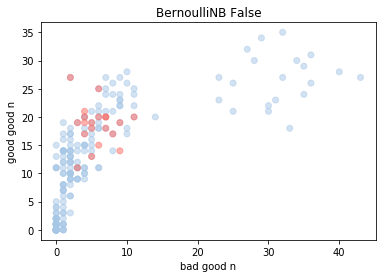

DecisionTreeClassifier mean bad good n (x) 31.35
DecisionTreeClassifier mean good good n (y) 26.7
DecisionTreeClassifier good good / bad good n ratio 0.8516746411483253


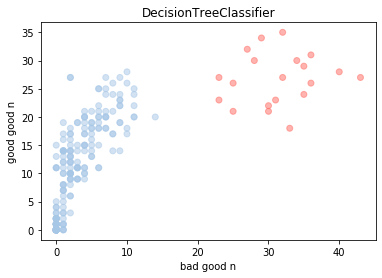

MultinomialNB False mean bad good n (x) 0.25
MultinomialNB False mean good good n (y) 0.6
MultinomialNB False good good / bad good n ratio 2.4


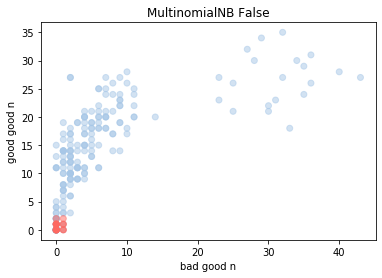

RandomForestClassifier mean bad good n (x) 1.45
RandomForestClassifier mean good good n (y) 10.7
RandomForestClassifier good good / bad good n ratio 7.379310344827586


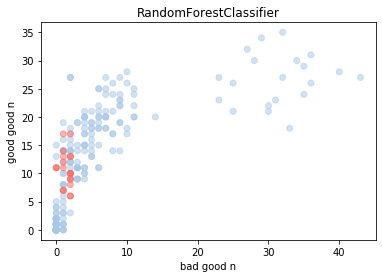

SGDClassifier mean bad good n (x) 4
SGDClassifier mean good good n (y) 14.8
SGDClassifier good good / bad good n ratio 3.7


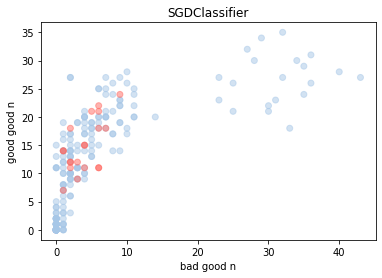

SVC mean bad good n (x) 9.2
SVC mean good good n (y) 23.25
SVC good good / bad good n ratio 2.5271739130434785


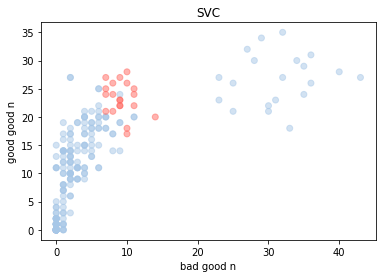

VotingClassifier (1) mean bad good n (x) 5.55
VotingClassifier (1) mean good good n (y) 18.45
VotingClassifier (1) good good / bad good n ratio 3.324324324324324


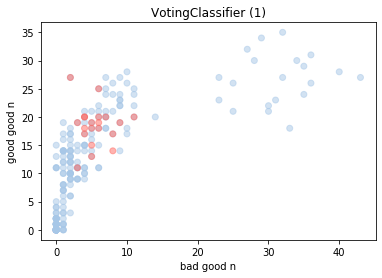

VotingClassifier (2) mean bad good n (x) 0.4
VotingClassifier (2) mean good good n (y) 2.65
VotingClassifier (2) good good / bad good n ratio 6.624999999999999


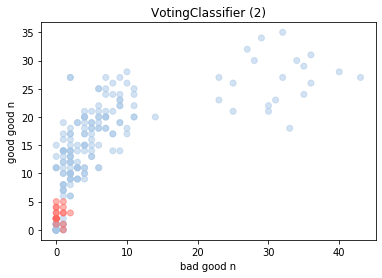

VotingClassifier (3) mean bad good n (x) 2.65
VotingClassifier (3) mean good good n (y) 13.65
VotingClassifier (3) good good / bad good n ratio 5.150943396226415


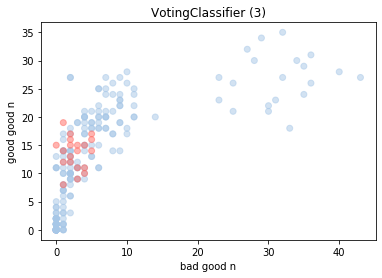

VotingClassifier (4) mean bad good n (x) 1.85
VotingClassifier (4) mean good good n (y) 11
VotingClassifier (4) good good / bad good n ratio 5.945945945945946


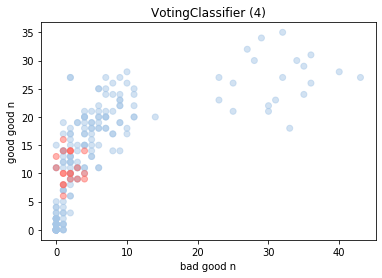

VotingClassifier (5) mean bad good n (x) 0
VotingClassifier (5) mean good good n (y) 0.35


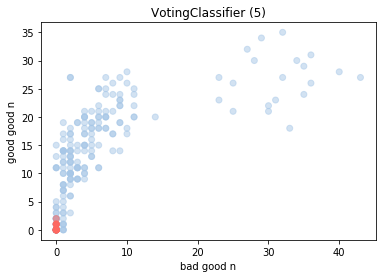

VotingClassifier (6) mean bad good n (x) 0
VotingClassifier (6) mean good good n (y) 0


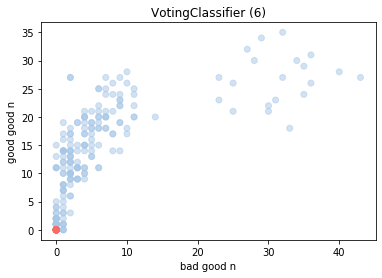

In [7]:
%matplotlib inline
import statistics
import matplotlib.pyplot as plt

classifier_names = []
for r in all_final_results:
    classifier_names.append(r['classifier'])

classifier_names = sorted(list(set(classifier_names)))

mean_data = []

for classifier_name in classifier_names:
    
    x = []
    y = []
    c = []
    
    match_x = []
    match_y = []
    
    for r in all_final_results:
        
        if r['classifier'] == classifier_name:
            pass
        else:
            x.append(r['bad good n'])
            y.append(r['good good n'])
            c.append('#A7C7E7')
    
    for r in all_final_results:
        
        if r['classifier'] == classifier_name:
            x.append(r['bad good n'])
            y.append(r['good good n'])
            match_x.append(r['bad good n'])
            match_y.append(r['good good n'])
            c.append('#ff6961')
        else:
            pass
        
    print(classifier_name, 'mean bad good n (x)', statistics.mean(match_x))
    print(classifier_name, 'mean good good n (y)', statistics.mean(match_y))
    if statistics.mean(match_x) > 0:
        print(classifier_name, 'good good / bad good n ratio', 
              (statistics.mean(match_y) / statistics.mean(match_x)))
        
        mean_data.append({'run': '10', 'classifier_name': classifier_name, 
                          'false positive n': statistics.mean(match_x), 
                          'true positive n': statistics.mean(match_y),
                          'n true positive to false positive': (statistics.mean(match_y) / statistics.mean(match_x))})
        
    plt.scatter(x, y, c=c, alpha=0.5)
    plt.title(classifier_name)
    plt.xlabel('bad good n')
    plt.ylabel('good good n')
    
    plt.show()
    

In [8]:
import re, json

#print(re.sub('\}, ', '},\n', str(mean_data)))

f = open('10_mean_data.json', 'w', encoding='utf-8')
f.write(json.dumps(mean_data, indent=4))
f.close()

print('ok')

ok
